# Challenge Frequência e Medidas

### Desafio 1: O perfil do Catálogo da Netflix

Esse desafio tem como objetivo responder algumas perguntas através da
análise de dados, aprofundando o conhecimento em frequência e medidas.
Os dados que deverão ser utilizado nesse script foram baixados do kaggle

Este conjunto de dados consiste na lista de filmes e suas respectivas e
suas informações.
Variáveis:
● show_id - id único do filme/série.

● title - título do filme ou série

● director - diretor do filme ou série

● cast - elenco do filme ou série

● country - país do filme ou série

● date_added - data que foi adicionado no Netflix

● reading score - ano de lançamento original do filme

● rating - classificação da televisão

● duration - duração total do filme ou série.

● listed_in - categoria ou gênero do filme ou série.

● description -descrição do filme ou série.

● type - tipo de filme ou série

Os dados são arquivos em .csv.

### 📝 Tarefas:
### 1. Exploração inicial:
   
●  Quantas linhas e colunas tem o dataset?

● Quais são os tipos das variáveis e se há valores ausentes?

In [16]:
#importando bibliotecas 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importando o dataset
df = pd.read_csv("netflix_titles_nov_2019.csv")
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [3]:
#Quantas linhas e colunas tem o dataset?
linhas, colunas = df.shape
print(f"O dataset tem {linhas} linhas e {colunas} colunas")

O dataset tem 5837 linhas e 12 colunas


In [4]:
#Quais são os tipos das variáveis e se há valores ausentes?
#verificando o tipo de variaveis
df.dtypes

show_id          int64
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
type            object
dtype: object

In [5]:
#contando quantos valores ausentes (`NaN`) existem em cada coluna.

nulos = df.isnull().sum()
nulos

show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64

### 2. Análises de frequência:

● Qual a proporção de filmes vs. séries no catálogo?

● Qual o gênero mais frequente?

In [ ]:
#Qual a proporção de filmes vs. séries no catálogo?

#df.head()
#value_counts -> contando quantas vezes cada categoria aparece na coluna `type`.
#`normalize=True` faz com que os valores sejam expressos em proporção.
# Multiplicando por 100 e convertendo para porcentagem.

proporcao = df['type'].value_counts(normalize=True) * 100

print("Proporção de Filmes vs. Séries no catálogo:")
print(proporcao)

Proporção de Filmes vs. Séries no catálogo:
0       TV Show
1         Movie
2         Movie
3         Movie
4       TV Show
         ...   
5832      Movie
5833      Movie
5834      Movie
5835    TV Show
5836      Movie
Name: type, Length: 5837, dtype: object


In [7]:
#df.head()

# Contando as frequências dos valores na coluna 'type'
frequencia_genero = df['type'].value_counts().idxmax()

print(f"Genero mais frequente: {frequencia_genero}")

Genero mais frequente: Movie


### 3. Análises estatísticas:
● Qual a média, mediana e moda do tempo de duração dos filmes?

● Qual o filme mais curto e mais longo?

In [8]:
#df.head()

# Filtrar apenas os filmes (onde 'duration' não é nulo e tem a palavra 'min' e são diferentes de nulo -> na=False)
filmes = df[df['duration'].notnull() & df['duration'].str.contains('min', na=False)]

# : na parte antes da vírgula significa "selecione todas as linhas" do DataFrame. Após a virgula está acessando a coluna 'duration' do DataFrame filmes para modificar seus valores no DataFrame original.

# utilizado filmes['duration'].str.replace(' min', '', regex=False)  para remover o sufixo " min" da coluna 'duration' e deixar apenas o número da duração de cada filme. 
filmes.loc[:, 'duration'] = filmes['duration'].str.replace(' min', '', regex=False)

# to_numeric -> convertendo 'duration' para inteiro, ignorando erros
filmes.loc[:, 'duration'] = pd.to_numeric(filmes['duration'], errors='coerce')

# Remover valores nulos resultantes da conversão
#parâmetro subset é usado para especificar as colunas nas quais a operação será aplicada. 
filmes = filmes.dropna(subset=['duration'])

# Calcular média, mediana e moda
media_duracao = filmes['duration'].mean()
mediana_duracao = filmes['duration'].median()
moda_duracao = filmes['duration'].mode()[0]

# Exibir os resultados
print(f"Média da duração dos filmes: {media_duracao:.2f} minutos")
print(f"Mediana da duração dos filmes: {mediana_duracao:.2f} minutos")
print(f"Moda da duração dos filmes: {moda_duracao} minutos")

Média da duração dos filmes: 98.03 minutos
Mediana da duração dos filmes: 97.00 minutos
Moda da duração dos filmes: 90 minutos


In [14]:
# Encontrando o filme mais curto
filme_mais_curto = filmes.loc[filmes['duration'] == filmes['duration'].min()]

# Encontrar o filme mais longo
filme_mais_longo = filmes.loc[filmes['duration'] == filmes['duration'].max()]

# Armazenar a duração dos filmes
filme_mais_curto['duration'].values[0]
filme_mais_longo['duration'].values[0]

#print(f"\nDuração mais curta: {filme_mais_curto} minutos")
#print(f"Duração mais longa: {filme_mais_longo} minutos")

print(f"\nFilme mais curto:")
print(filme_mais_curto[['title', 'duration']])

print(f"\nFilme mais longo:")
print(filme_mais_longo[['title', 'duration']])


Filme mais curto:
       title duration
1185  Silent        3

Filme mais longo:
                           title duration
2160  Black Mirror: Bandersnatch      312


### 4. Visualização de dados:

● Criar um gráfico de barras para mostrar a quantidade de títulos
por gênero.

● Criar um histograma para analisar a distribuição da duração dos
filmes.

C:\Users\ACER\AppData\Local\Temp\ipykernel_13324\1357706257.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=titulo_por_genero.index, y=titulo_por_genero.values, palette="Set2")


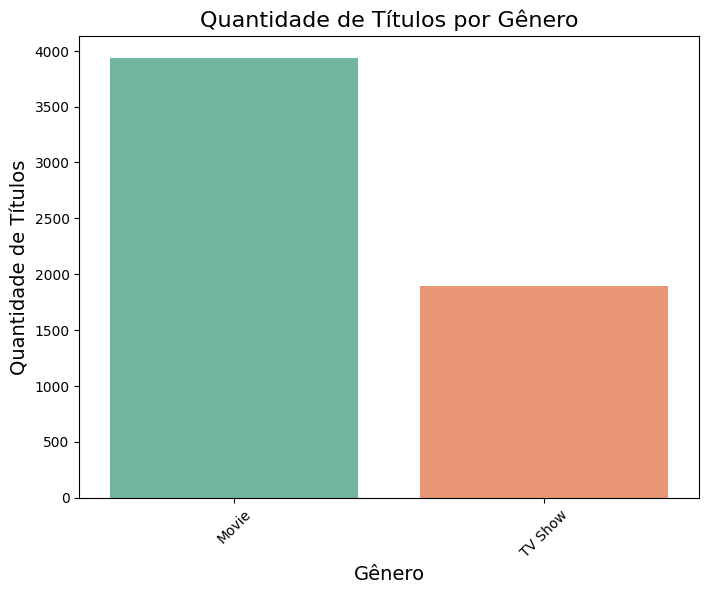

In [24]:
#df.head()

# Agrupando e contando o número de títulos por gênero (coluna 'type')
titulo_por_genero = df['type'].value_counts()
titulo_por_genero

# Criando o gráfico de barras com tamanho 8 por 6
plt.figure(figsize=(8, 6))


#Distribuindo eixos
# sns.barplot() -> eixo x terá os gêneros e o eixo y terá a quantidade de títulos.
#palette="viridis": Define o esquema de cores do gráfico
sns.barplot(x=titulo_por_genero.index, y=titulo_por_genero.values, palette="Set2")

#Ajustes no gráfico:
# Adicionando títulos e labels
plt.title('Quantidade de Títulos por Gênero', fontsize=16)
plt.xlabel('Gênero', fontsize=14)
plt.ylabel('Quantidade de Títulos', fontsize=14)

# Exibir o gráfico
plt.xticks(rotation=45)
plt.show()


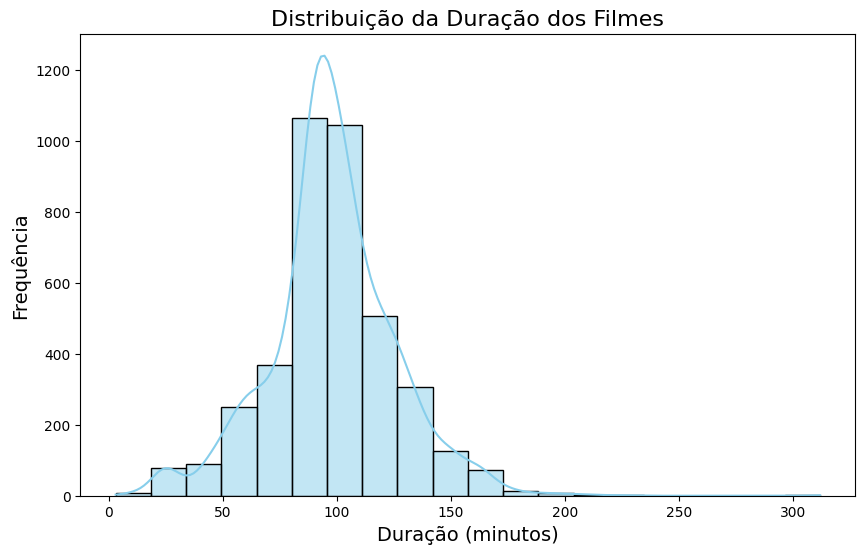

In [ ]:
#Criar um histograma para analisar a distribuição da duração dos filmes.

# Limpar a coluna 'duration' para garantir que apenas os números permanecem
df['duration'] = df['duration'].str.replace(' min', '', regex=False)


# Converter a coluna 'duration' para numérico
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')


#Filtrando os filmes :
# Filtrar apenas os filmes (considerando que 'type' tem o valor 'Movie' para filmes)
filmes = df[df['type'] == 'Movie']

# Criando o histograma
#definindo o tamanho do grafico -gráfico terá 10 polegadas de largura e 6 pol
#bins=20: Define o número de intervalos (bins) no histograma.
#kde=True: Ativa a sobreposição de uma Curva de Densidade de Kernel (KDE) no histograma,
#color="skyblue": Define um cor das barras do histograma.
#edgecolor="black": Define a cor das bordas das barras, que são coloridas de preto.

plt.figure(figsize=(10, 6))
sns.histplot(filmes['duration'], bins=20, kde=True, color="skyblue", edgecolor="black")

# Adicionar título e rótulos aos eixos
plt.title('Distribuição da Duração dos Filmes', fontsize=16)
plt.xlabel('Duração (minutos)', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

# Exibir o gráfico
plt.show()